In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# Import dataset

In [2]:
path = "C:/CodeTest1/Venv1/SalesFeb2023/"
file1 = "Query1.xlsx"
file2 = "Query2.xlsx"
df = pd.read_excel(path + file1)
df2 = pd.read_excel(path + file2)

# Create Dataset

In [145]:
# df = pd.read_csv(csv_path)
# # Slice [start:stop:step], starting from index 5 take every 6th record.
# df = df[5::6]

# date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [146]:
# df = pd.read_csv(csv_path)
#data is in 10min intervals we'll subsample every one hour
# Slice [start:stop:step], starting from index 5 take every 6th record.
# df = df[5::6]
# #Removes Time Index
# date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [147]:
# df = pd.read_csv(csv_path)
#data is in 10min intervals we'll subsample every one hour
# Slice [start:stop:step], starting from index 5 take every 6th record.
# df = df[5::6]
#Removes Time Index

In [3]:
df.head(5)

,SalesDate,CustomerName,C_TotalSales
0,2022-07-06,Raaga Indian Kitchen and Bar,569.69
1,2022-11-06,"Bawarchi Biryanis - Fort Collins, CO",4114.14
2,2023-02-09,"Aappakadai Indian Chettinad - Santa Clara, CA",2573.13
3,2022-06-08,Cafe Delhi,4474.28
4,2022-11-19,"Bawarchi Biryanis - Mississauga, ON",11165.23


In [284]:
search_phrase = 'Aappakadai Indian Chettinad - Santa Clara, CA'
df = df.loc[df.CustomerName == search_phrase]
df = df.sort_values(by='SalesDate',ascending=True)
date_time = pd.to_datetime(df.pop('SalesDate'), format='%Y-%m-%d')
df

,CustomerName,C_TotalSales
16080,"Aappakadai Indian Chettinad - Santa Clara, CA",3187.39
1955,"Aappakadai Indian Chettinad - Santa Clara, CA",2594.12
32056,"Aappakadai Indian Chettinad - Santa Clara, CA",8213.16
13071,"Aappakadai Indian Chettinad - Santa Clara, CA",6712.50
3068,"Aappakadai Indian Chettinad - Santa Clara, CA",6132.96
...,...,...
18611,"Aappakadai Indian Chettinad - Santa Clara, CA",5957.86
30155,"Aappakadai Indian Chettinad - Santa Clara, CA",5665.28
6669,"Aappakadai Indian Chettinad - Santa Clara, CA",2344.98
21861,"Aappakadai Indian Chettinad - Santa Clara, CA",3340.90


# EDA

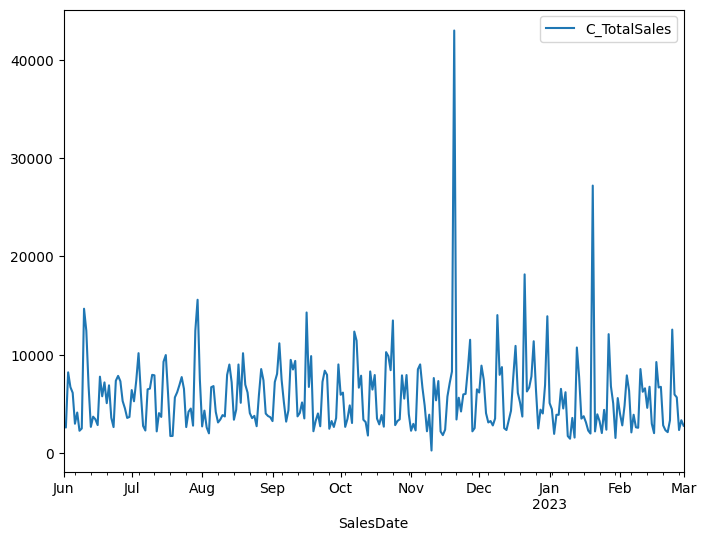

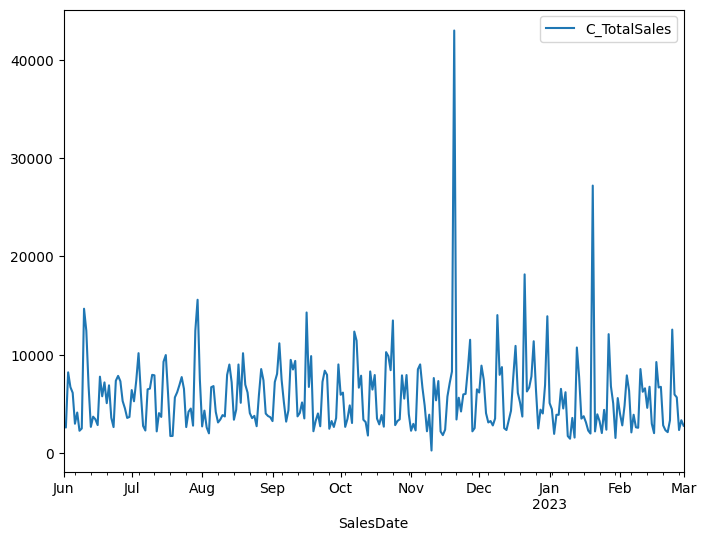

In [203]:
#Plot features over time
# plot_cols = ['C_TotalSales']
# plot_features = df[plot_cols]
# plot_features.index = date_time
# _ = plot_features.plot(subplots=True)
# #Features for 480 hours
# plot_features = df[plot_cols][:480]
# plot_features.index = date_time[:480]
# _ = plot_features.plot(subplots=True)

In [ ]:
#Basic Stats
# df.describe().transpose()
# df.corr().transpose()

In [152]:
#Replaces erroneous values or bad numbers
# wv = df['wv (m/s)']
# bad_wv = wv == -9999.0
# wv[bad_wv] = 0.0

# max_wv = df['max. wv (m/s)']
# bad_max_wv = max_wv == -9999.0
# max_wv[bad_max_wv] = 0.0

# # The above inplace edits are reflected in the DataFrame.
# df['wv (m/s)'].min()

# Feature Engineering


In [153]:
#Colorplot of Wind Direction
# plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
# plt.colorbar()
# plt.xlabel('Wind Direction [deg]')
# plt.ylabel('Wind Velocity [m/s]')

## Change of Variables

In [154]:
#Changes wind direction  (theta) and velocity (r) from polar coordinates to cartesian
# wv = df.pop('wv (m/s)')
# max_wv = df.pop('max. wv (m/s)')

# # Convert to radians.
# wd_rad = df.pop('wd (deg)')*np.pi / 180

# # Calculate the wind x and y components.
# df['Wx'] = wv*np.cos(wd_rad)
# df['Wy'] = wv*np.sin(wd_rad)

# # Calculate the max wind x and y components.
# df['max Wx'] = max_wv*np.cos(wd_rad)
# df['max Wy'] = max_wv*np.sin(wd_rad)

In [155]:
#New Wind Distribution
# plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
# plt.colorbar()
# plt.xlabel('Wind X [m/s]')
# plt.ylabel('Wind Y [m/s]')
# ax = plt.gca()
# ax.axis('tight')

## Finding frequencies in time series data

In [156]:
#Timestamps
# timestamp_s = date_time.map(pd.Timestamp.timestamp)
# timestamp_s

In [157]:
# date_time.plot()
# timestamp_s.plot()
# timestamp_s.describe().transpose()

In [158]:
# day = 24*60*60
# year = (365.2425)*day
# #Change time stamp column to get usable signal data
# #NEvery second in the timestamp 

# df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
# df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
# df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
# df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [159]:
# This plot show one period or that repeats every 24 hours
# plt.plot(np.array(df['Day sin'])[:25])
# plt.plot(np.array(df['Day cos'])[:25])
# plt.xlabel('Time [h]')
# plt.title('Time of day signal')

## Frequency information using FFT

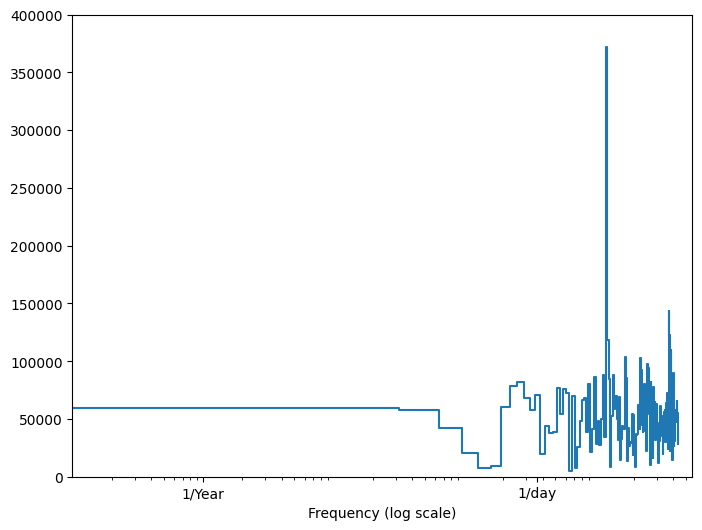

In [204]:
#Real FFT switches from time domain to signal domain higher signals show cyclic behavior
fft = tf.signal.rfft(df['C_TotalSales'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['C_TotalSales'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')
#Temperature has high input signals at the yearly and daily levels

In [205]:
fft = tf.signal.rfft(df['C_TotalSales'])
fft.shape

TensorShape([138])

# Data Split

In [285]:
column_indices = {name: i for i, name in enumerate(df.columns)}
df = df.copy()
df.drop('CustomerName',axis=1,inplace=True)
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [286]:
df.shape

(274, 1)

In [287]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [209]:
# df_std = (df - train_mean) / train_std
# df_std
# df_std = df_std.melt(var_name='Column', value_name='Normalized')
# plt.figure(figsize=(12, 6))
# ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
# _ = ax.set_xticklabels(df.keys(), rotation=90)

In [210]:
train_df

,C_TotalSales
16080,-0.666686
1955,-0.816986
32056,0.606551
13071,0.226371
3068,0.079549
...,...
22088,-0.445524
8555,-0.684288
7531,-0.648270
31624,-0.762201


In [211]:

# train_df = train_df.melt(var_name='Column', value_name='UnNormalized')

# plt.figure(figsize=(12, 6))
# ax = sns.violinplot(x='Column', y='UnNormalized', data=train_df)
# _ = ax.set_xticklabels(df.keys(), rotation=90)

# Normalize the Data

In [168]:
# May also normalize via moving average
# train_mean = train_df.mean()
# train_std = train_df.std()

# train_df = (train_df - train_mean) / train_std
# val_df = (val_df - train_mean) / train_std
# test_df = (test_df - train_mean) / train_std

In [169]:
# df_std = (df - train_mean) / train_std
# df_std = df_std.melt(var_name='Column', value_name='Normalized')
# plt.figure(figsize=(12, 6))
# ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
# _ = ax.set_xticklabels(df.keys(), rotation=90)

# Construction of Input Windows

In [288]:
# Sliding Inout Window for  Models
#Width (Total number of timesteps for the input)
#Time  (offset to start the new input sequence)
# Which features for input and labels
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

## Model to predict one hour into the future, exactly 24 hours in to the future using 24 hours of data

In [289]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                    label_columns=['hi'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['hi']

## Model to predict one hour given 6

In [290]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                    label_columns=['C_TotalSales'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['C_TotalSales']

## Model to predict one month into the future, using one month of data

In [291]:
w3 = WindowGenerator(input_width=30, label_width=30, shift=1,
                    label_columns=['C_TotalSales'])
w3

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['C_TotalSales']

## Splitting the Data

In [292]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [293]:
w3.total_window_size

31

In [294]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w3.total_window_size]),
                           
                           np.array(train_df[50:50+w3.total_window_size]),
                          
                           np.array(train_df[100:100+w3.total_window_size])])

example_inputs, example_labels = w3.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 31, 1)
Inputs shape: (3, 30, 1)
Labels shape: (3, 30, 1)


In [295]:
w3

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['C_TotalSales']

In [296]:
w3.example = example_inputs, example_labels

In [297]:
def plot(self, model=None, plot_col='C_TotalSales', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [d]')

WindowGenerator.plot = plot

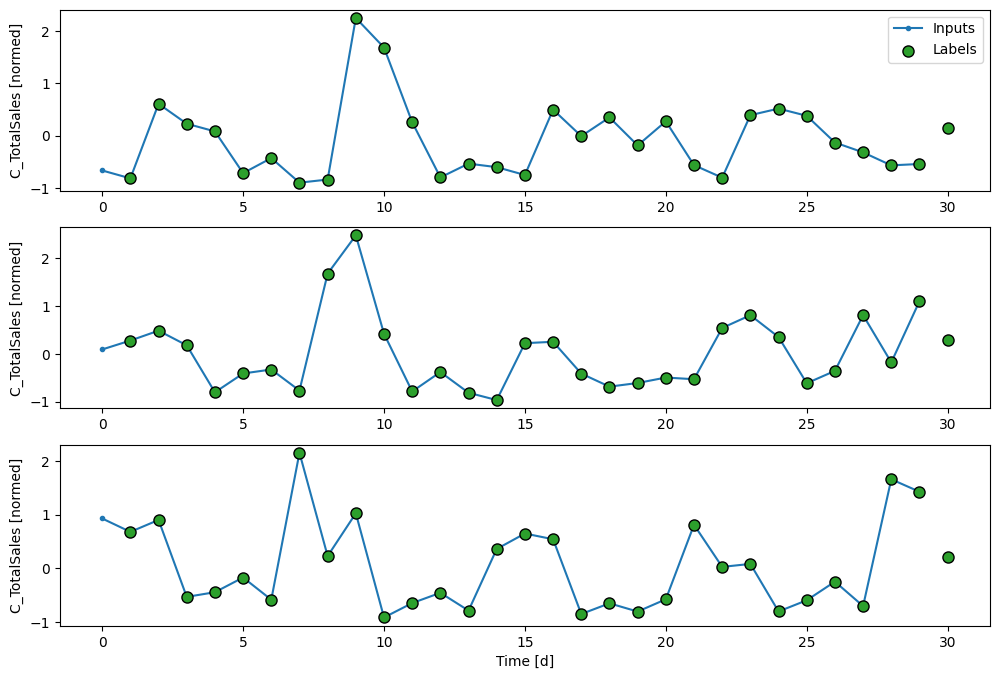

In [298]:
w3.plot()

## Create Tensorflow Dataset

In [299]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds
# Use Window Generator's train, val, test data
WindowGenerator.make_dataset = make_dataset

## Create DataFrames

In [300]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [301]:
# Each element is an (inputs, label) pair.
w3.train.element_spec

(TensorSpec(shape=(None, 30, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 30, 1), dtype=tf.float32, name=None))

In [302]:
# Use DataFrame Iterator to get labels
for example_inputs, example_labels in w3.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 30, 1)
Labels shape (batch, time, features): (32, 30, 1)


## Single Step Model

In [303]:
# Produce (input,label) pairs
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['C_TotalSales'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['C_TotalSales']

In [304]:
# Iterate over training and validation datasets
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 1)
Labels shape (batch, time, features): (32, 1, 1)


## Baseline Model
(Not Finished)

In [305]:
# Predicts current sales data as sales (no change)
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [306]:
single_step_window.val

<MapDataset element_spec=(TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

In [307]:
baseline = Baseline(label_index=column_indices['C_TotalSales'])
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])
baseline

In [ ]:
baseline.fit(single_step_window.train)
# baseline.evaluate(single_step_window.val)

In [270]:
single_step_window.train

<MapDataset element_spec=(TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

In [190]:
w3.val

<MapDataset element_spec=(TensorSpec(shape=(None, 30, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 30, 1), dtype=tf.float32, name=None))>

In [ ]:
baseline = Baseline(label_index=column_indices['C_TotalSales'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

# Linear Model

In [316]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['C_TotalSales'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['C_TotalSales']

In [317]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [318]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 1)
Output shape: (32, 1, 1)


# Package Training 

In [328]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [329]:
# Evaluate Linear Model
history = compile_and_fit(linear, wide_window)

val_performance['Linear'] = linear.evaluate(wide_window.val)
performance['Linear'] = linear.evaluate(wide_window.test, verbose=0)

Epoch 1/20
6/6 [==============================] - 0s 23ms/step - loss: 2.5830 - mean_absolute_error: 0.9375 - val_loss: 4.1067 - val_mean_absolute_error: 1.2326
Epoch 2/20
6/6 [==============================] - 0s 13ms/step - loss: 2.5692 - mean_absolute_error: 0.9345 - val_loss: 4.0853 - val_mean_absolute_error: 1.2290
Epoch 3/20
6/6 [==============================] - 0s 10ms/step - loss: 2.5554 - mean_absolute_error: 0.9315 - val_loss: 4.0637 - val_mean_absolute_error: 1.2258
Epoch 4/20
6/6 [==============================] - 0s 9ms/step - loss: 2.5405 - mean_absolute_error: 0.9286 - val_loss: 4.0426 - val_mean_absolute_error: 1.2224
Epoch 5/20
6/6 [==============================] - 0s 10ms/step - loss: 2.5273 - mean_absolute_error: 0.9257 - val_loss: 4.0217 - val_mean_absolute_error: 1.2190
Epoch 6/20
6/6 [==============================] - 0s 9ms/step - loss: 2.5132 - mean_absolute_error: 0.9229 - val_loss: 4.0014 - val_mean_absolute_error: 1.2158
Epoch 7/20
6/6 [====================

In [ ]:
wide_window.example = example_inputs, example_labels

In [330]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 24, 1)
Output shape: (32, 24, 1)


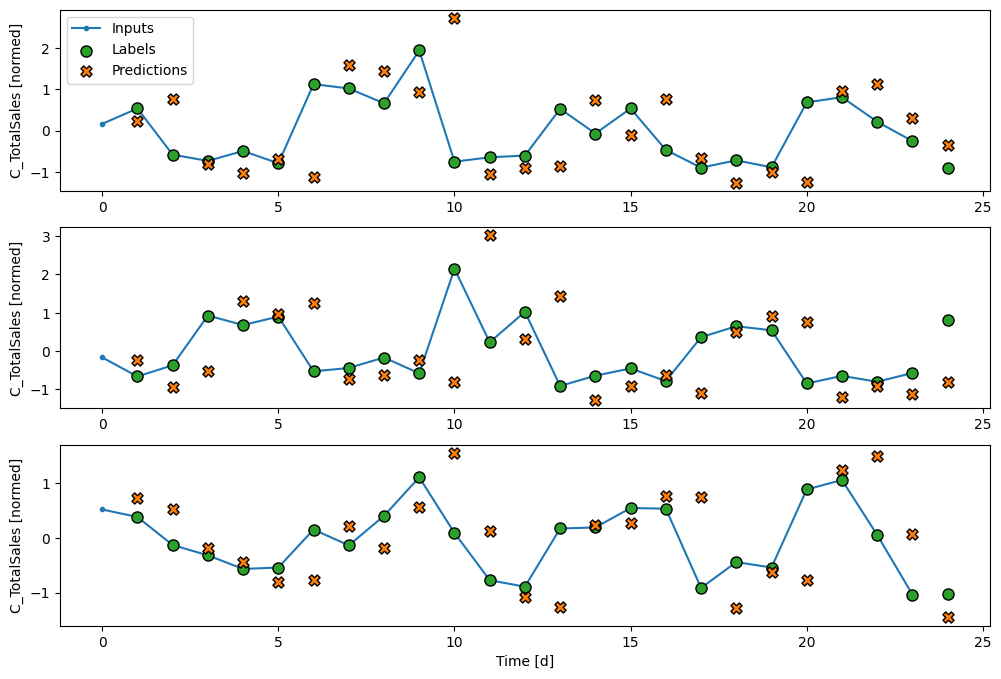

In [331]:
wide_window.plot(linear)

# Pickle Model

In [337]:
import pickle
import os

# train the model
history = compile_and_fit(linear, wide_window)

# create the directory if it doesn't exist
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')

# train the model

# save the model as a pickle file in the saved_models directory
with open('saved_models/linear_model.pickle', 'wb') as f:
    pickle.dump(linear, f)


Epoch 1/20
6/6 [==============================] - 0s 23ms/step - loss: 1.8456 - mean_absolute_error: 0.7753 - val_loss: 2.9739 - val_mean_absolute_error: 1.0392
Epoch 2/20
6/6 [==============================] - 0s 10ms/step - loss: 1.8350 - mean_absolute_error: 0.7729 - val_loss: 2.9567 - val_mean_absolute_error: 1.0361
Epoch 3/20
6/6 [==============================] - 0s 10ms/step - loss: 1.8237 - mean_absolute_error: 0.7705 - val_loss: 2.9401 - val_mean_absolute_error: 1.0331
Epoch 4/20
6/6 [==============================] - 0s 9ms/step - loss: 1.8136 - mean_absolute_error: 0.7682 - val_loss: 2.9232 - val_mean_absolute_error: 1.0301
Epoch 5/20
6/6 [==============================] - 0s 9ms/step - loss: 1.8028 - mean_absolute_error: 0.7659 - val_loss: 2.9068 - val_mean_absolute_error: 1.0271
Epoch 6/20
6/6 [==============================] - 0s 9ms/step - loss: 1.7917 - mean_absolute_error: 0.7636 - val_loss: 2.8905 - val_mean_absolute_error: 1.0241
Epoch 7/20
6/6 [=====================

# Save Model using Tensorflow

In [340]:
# save the model using TensorFlow
tf.keras.models.save_model(
    linear,
    'linear_model',
    overwrite=True,
    include_optimizer=True,
    save_format='tf'
)

INFO:tensorflow:Assets written to: linear_model\assets


INFO:tensorflow:Assets written to: linear_model\assets


# Tensorflow Serving

In [24]:
!which tensorflow_model_server

'which' is not recognized as an internal or external command,
operable program or batch file.


In [27]:
!tensorflow_model_server --port=9000 --model_name=linear_model --model_base_path=C:/CodeTest1/Venv1/SalesFeb2023/pringledatascience/pringledatascience/linear_model/

'tensorflow_model_server' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

save_model(
	model,
	export_path,
	overwrite=True,
	include_optimizer=True
)

print('\nSaved model:')
!ls -l {export_path}

# The command display input and output kayers with signature and data type
# These details are required when we make gRPC API call
!saved_model_cli show --dir {export_path} --all

# Create a compressed model from the savedmodel .
!tar -cz -f model.tar.gz --owner=0 --group=0 -C /tmp/1/ .


In [7]:
import requests
import json
import numpy as np

# Define the input data
input_data = np.array([[1.0]])

# Define the URL of the TensorFlow Serving server
url = 'http://localhost:9001/v1/models/linear_model:predict'

# Define the JSON request body
request_body = json.dumps({
    'instances': input_data.tolist()
})

# Send the HTTP POST request
response = requests.post(url, data=request_body)
response
# Parse the JSON response body
# response_body = json.loads(response.text)

# Extract the predictions from the response
# predictions = response_body['predictions']

# # Print the predictions
# print(predictions)


<Response [400]>

In [8]:
import requests
import json

# Define the input data
data = {
    "instances": [[7], [8], [9]]
}

# Send the request to the server
response = requests.post('http://localhost:9001/v1/models/linear_model:predict', json=data)

# Print the response
print(json.loads(response.text))

{'error': 'indices[0] = 2 is not in [0, 2)\n\t [[{{function_node __inference__wrapped_model_22249}}{{node sequential_3/dense_3/Tensordot/GatherV2_1}}]]'}


## Load tf model

In [7]:
import tensorflow as tf

# define the path to the directory where the SavedModel is stored
model_path = 'C:/CodeTest1/Venv1/SalesFeb2023/pringledatascience/pringledatascience/linear_model'

# load the model from the directory
model = tf.keras.models.load_model(model_path)

# make predictions using the loaded model
input_data = tf.constant([[[0.2]]])
predictions = model.predict(input_data)

print('Predictions:', predictions)


1/1 [==============================] - 0s 140ms/step
Predictions: [[[0.21317075]]]


In [11]:
model.input_shape

(None, None, 1)

In [9]:
import numpy as np

# assume input_data is the input data sent by the client
input_data = np.array([[[0.2]]])

# get the expected input shape of the model
expected_shape = model.input_shape

# compare the shape of the input data to the expected shape
if input_data.shape == expected_shape:
    print('Input data is in the correct shape.')
else:
    print('Input data is not in the correct shape.')


Input data is not in the correct shape.


In [14]:
# Saved model Directory 
model_dir = "./model"
model_version = 1
model_export_path = f"{model_dir}/{model_version}"

tf.saved_model.save(
    model,
    export_dir=model_export_path,
)

print(f"SavedModel files: {os.listdir(model_export_path)}")

INFO:tensorflow:Assets written to: ./model/1\assets


INFO:tensorflow:Assets written to: ./model/1\assets


SavedModel files: ['assets', 'fingerprint.pb', 'saved_model.pb', 'variables']


In [15]:
# Examine saved model
!saved_model_cli show --dir {model_export_path} --tag_set serve --signature_def serving_default


The given SavedModel SignatureDef contains the following input(s):
  inputs['dense_3_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, -1, 1)
      name: serving_default_dense_3_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_3'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, -1, 1)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


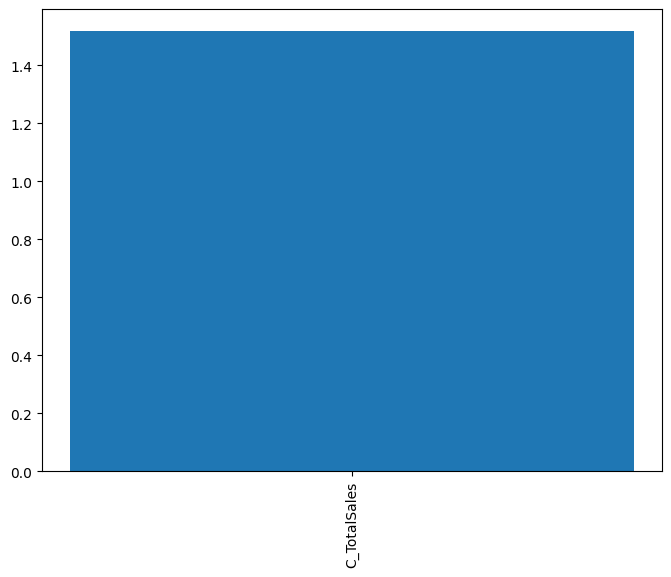

In [323]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [324]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
6/6 [==============================] - 1s 31ms/step - loss: 1.0037 - mean_absolute_error: 0.6382 - val_loss: 1.3078 - val_mean_absolute_error: 0.7196
Epoch 2/20
6/6 [==============================] - 0s 9ms/step - loss: 0.9671 - mean_absolute_error: 0.6173 - val_loss: 1.3095 - val_mean_absolute_error: 0.7232
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 1.3358 - mean_absolute_error: 0.7192


In [327]:
import pickle

# train the model
linear.fit(wide_window.train)

# save the model as a pickle file
with open('baseline_model.pickle', 'wb') as f:
    pickle.dump(baseline, f)


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [2]:
import requests
import numpy as np

# define the input data
input_data = np.array([[[0.2]]])

# send the request to the server
response = requests.post('http://localhost:9000/v1/models/linear_model:predict', json={'inputs': input_data.tolist()})

# check if the response is valid
if response.ok:
    print('Model served successfully.')
    print('Predictions:', response.json()['outputs'])
else:
    print('Error:', response.status_code, response.text)


ConnectionError: ('Connection aborted.', BadStatusLine('ÿ\x00\x00\x00\x00\x00\x00\x00\x01\x7f'))